In [1]:
import xarray as xr
import numpy as np
import cv2 as cv
import rioxarray as rxr
import matplotlib.pyplot as plt
from scipy import ndimage, misc
import rasterio.features as riofeat  # rasterio features include sieve filter
import rasterio
from glob import glob
#plt.rcParams["figure.figsize"] = (20,20)

In [2]:
#data_filenames = glob('/adapt/nobackup/projects/ilab/projects/srlite/input/Siberia/*M1BS*.tif')
#print(len(data_filenames))

In [3]:
#for imagef in data_filenames:
#    print(imagef)
#    data_values = rxr.open_rasterio(imagef).transpose("y", "x", "band")
#    plt.imshow(data_values[:, :, :3]/10000)
#    plt.show()

In [4]:
#data_filename = '/adapt/nobackup/projects/ilab/projects/srlite/input/Howland/WV02_20160117_M1BS_10300100505E7E00-toa.tif'

In [5]:
#data_values = rxr.open_rasterio(data_filename).transpose("y", "x", "band")
#data_values.shape
#plt.imshow(data_values[:, :, :3]/10000)
#plt.show()

#GE01_20100310_M1BS_1050410004191E00-toa.cloudmask.tif
#QB02_20030203_M1BS_10100100019B8700-toa.cloudmask.tif
#GE01_20150621_M1BS_10504100130C2700-toa.cloudmask.tif
#QB02_20050113_M1BS_101001000382CF00-toa.cloudmask.tif
#GE01_20160531_M1BS_10500100049D6600-toa.cloudmask.tif
#QB02_20050830_M1BS_10100100047C7100-toa.cloudmask.tif
#GE01_20160531_M1BS_10500100049D6800-toa.cloudmask.tif
#QB02_20051005_M1BS_1010010004912200-toa.cloudmask.tif
#-----GE01_20160608_M1BS_1050010004BA6B00-toa.cloudmask.tif
#QB02_20070211_M1BS_101001000578A400-toa.cloudmask.tif
#GE01_20160608_M1BS_1050010004BA6D00-toa.cloudmask.tif
#QB02_20070419_M1BS_1010010005952200-toa.cloudmask.tif
#GE01_20210214_M1BS_10500100227B0500-toa.cloudmask.tif
#QB02_20080408_M1BS_1010010007E4C300-toa.cloudmask.tif
#QB02_20020606_M1BS_1010010000918F00-toa.cloudmask.tif

In [160]:
#input_filename = 'WV03_20180529_M1BS_104001003D032200-toa.cloudmask'
input_filename = 'WV03_20160815_M1BS_104001002139C700-toa.cloudmask'

In [161]:
filename = f'/adapt/nobackup/projects/ilab/projects/CloudMask/products/srlite/v1/Siberia/{input_filename}.tif'
#filename = f'/adapt/nobackup/projects/ilab/projects/CloudMask/products/srlite/v1.2/Siberia/{input_filename}.tif'
#filename = f'/adapt/nobackup/projects/ilab/projects/CloudMask/products/srlite/v1.2/Howland/WV03_20180512_M1BS_104001003C325900-toacloudmask.tif'
output_filename = f'/adapt/nobackup/projects/ilab/projects/CloudMask/products/srlite/v1.2/Siberia/{input_filename}.v1.2.tif'

In [162]:
image = rxr.open_rasterio(filename)
print(image.min().values)
data = np.squeeze(image.copy().values)
data[data < 0] = 0
data[data > 0] = 0

-9999.0


In [163]:
#data[50000:, :] = 0

In [164]:
#kernel = np.ones((15,15),np.uint8)
#kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(20,20))
#data_array = cv.morphologyEx(data, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(60,60)))#np.ones((50,50),np.uint8))
#data_array = cv.morphologyEx(data_array, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE,(40,40)))#np.ones((10,10),np.uint8))
#data_array = cv.dilate(data_array,np.ones((100,100),np.uint8),iterations = 1)
#data_array = cv.dilate(data_array,cv.getStructuringElement(cv.MORPH_ELLIPSE,(50,50)), iterations = 1)
#data_array = ndimage.median_filter(data_array, size=20)

In [165]:
#rasterio.open(filename).read(1)

In [166]:
#cupyx.scipy.ndimage.binary_closing(input, structure=None, iterations=1, output=None, origin=0, mask=None, border_value=0, brute_force=False)
#import cupyx
#import cupy

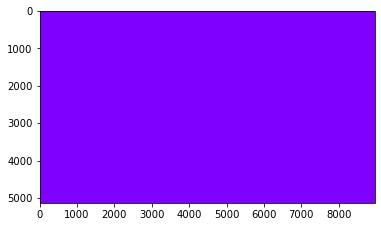

In [167]:
plt.imshow(data, cmap='rainbow')
plt.show()

In [168]:
#plt.imshow(data_array, cmap='rainbow')
#plt.show()

In [169]:
#data = data_array

In [170]:

# Get metadata to save raster
data = xr.DataArray(
    np.expand_dims(data, axis=0), #-1
    name='cloudmask',
    coords=image.coords,
    dims=image.dims,
    attrs=image.attrs
)
data.attrs['long_name'] = ('cloudmask')
#data = data.transpose("band", "y", "x")

# Set nodata values on mask
nodata = image.rio.nodata
data = data.where(image != nodata)

data.rio.write_nodata(nodata, encoded=True, inplace=True)

#data.min()

# Save COG file to disk
data.rio.to_raster(
    output_filename, BIGTIFF="IF_SAFER", compress='LZW',
    num_threads='all_cpus')#, driver='COG')
